In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ptfrwrd","key":"4a2f5a982ed53062345976efa42bd4c8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d andrewmvd/data-analyst-jobs 
! mkdir data
! unzip data-analyst-jobs.zip -d data

  0% 0.00/2.25M [00:00<?, ?B/s]
100% 2.25M/2.25M [00:00<00:00, 101MB/s]
Archive:  data-analyst-jobs.zip
  inflating: data/DataAnalyst.csv    


# **Let`s see the data:**

- explore count, types and etc;
- replace -1, '-1' and -1.0 with NaN;
- explore count of NaN-values;
- based on 'Salary Estimate' create 2 colimns: min and max salary;
- see values of 'Job Title'.

In [4]:
# Load dataset
data = pd.read_csv("data/DataAnalyst.csv")
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [6]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
data.replace(to_replace = "-1", value = np.nan, inplace = True)
data.replace(to_replace = -1.0, value = np.nan, inplace = True)
data.replace(to_replace = -1, value = np.nan, inplace = True)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [8]:
data.isna().sum()

Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

In [9]:
def clean_data(name):
    data[name] = data[name].str.replace(r'\r\n|\r|\n\d*[0-9](|.\d*[0-9]|)*$', '')
    data[name] = data[name].str.replace(r'\r\n|\r|\n', ' ')
    data[name] = data[name].str.replace(r"[$K*]", ' ')

In [10]:
clean_data("Company Name")
clean_data("Job Description")
clean_data("Salary Estimate")
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",37 - 66 (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,37 - 66 (Glassdoor est.),Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",37 - 66 (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,Data Analyst,37 - 66 (Glassdoor est.),Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,37 - 66 (Glassdoor est.),ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [76]:
divided_data = data["Salary Estimate"].str.split("-", expand=True)

In [12]:
data['Minimum Salary'] = pd.to_numeric(divided_data[0].str.extract('(\d+)', expand=False)) * 1000
data["Maximum Salary"] = pd.to_numeric(divided_data[1].str.extract('(\d+)', expand=False)) * 1000
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Minimum Salary,Maximum Salary
0,"Data Analyst, Center on Immigration and Justic...",37 - 66 (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37000.0,66000.0
1,Quality Data Analyst,37 - 66 (Glassdoor est.),Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",37 - 66 (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37000.0,66000.0
3,Data Analyst,37 - 66 (Glassdoor est.),Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37000.0,66000.0
4,Reporting Data Analyst,37 - 66 (Glassdoor est.),ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,66000.0


In [13]:
data["Job Title"].value_counts()[:20]

Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Quality Analyst        17
Data Analyst II             17
Data Analyst Junior         17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst III            11
Data Analyst I              11
Sr Data Analyst              9
Marketing Data Analyst       9
Data Management Analyst      8
Data Warehouse Analyst       8
Data Science Analyst         7
Technical Data Analyst       7
Name: Job Title, dtype: int64

In [14]:
data.describe()

,Rating,Founded,Minimum Salary,Maximum Salary
count,1981.000000,1593.000000,2252.000000,2252.000000
mean,3.731903,1978.362837,54266.873890,89979.129663
std,0.670332,47.822289,19575.374706,29315.605358
min,1.000000,1682.000000,24000.000000,38000.000000
25%,3.300000,1970.000000,41000.000000,70000.000000
50%,3.700000,1997.000000,50000.000000,87000.000000
75%,4.100000,2006.000000,64000.000000,104000.000000
max,5.000000,2019.000000,113000.000000,190000.000000


# **Visualizate of EDA:**


Text(0.5, 1.0, 'Top 20 Company with Highest number of Jobs')

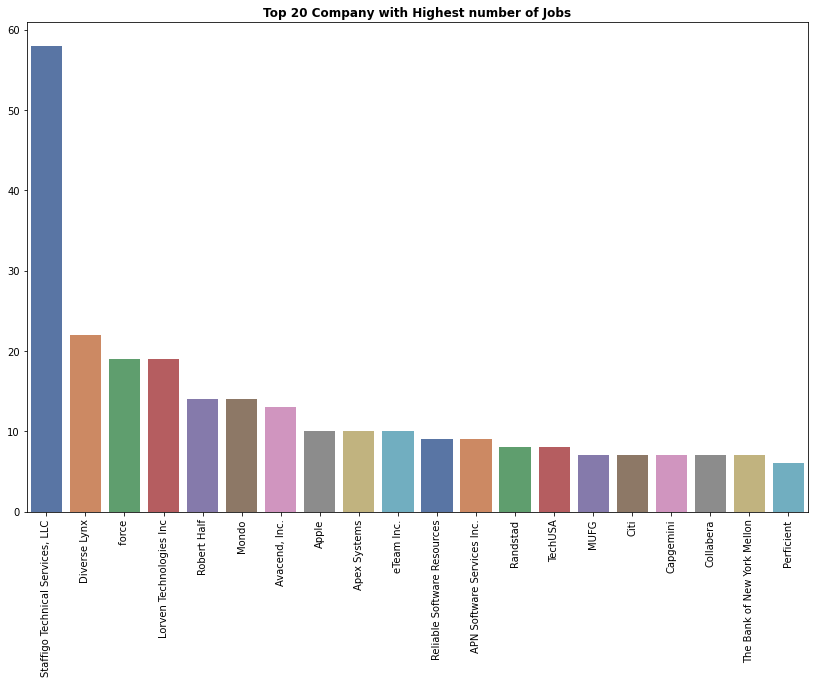

In [15]:
top_companies = data["Company Name"].value_counts().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(14,9))
rect1 = sns.barplot(x = top_companies.index, y = top_companies.values, palette="deep").set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Top 20 Company with Highest number of Jobs", fontweight="bold")

Text(0.5, 1.0, 'Ratings distribution')

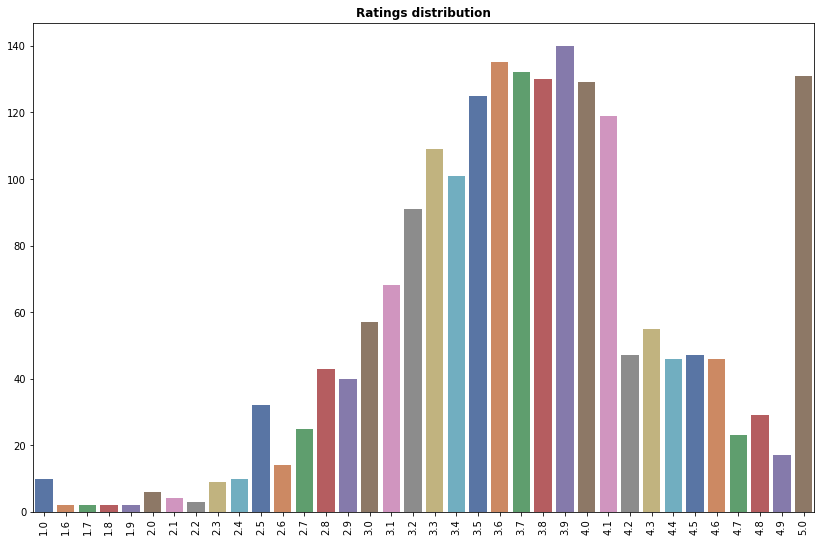

In [16]:
ratings_data = data['Rating'].value_counts()
fig, ax = plt.subplots(figsize=(14,9))
rect1 = sns.barplot(x = ratings_data.index, y = ratings_data.values, palette="deep").set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Ratings distribution", fontweight="bold")

Text(0.5, 1.0, 'Top 20 Industries with Highest number of Jobs')

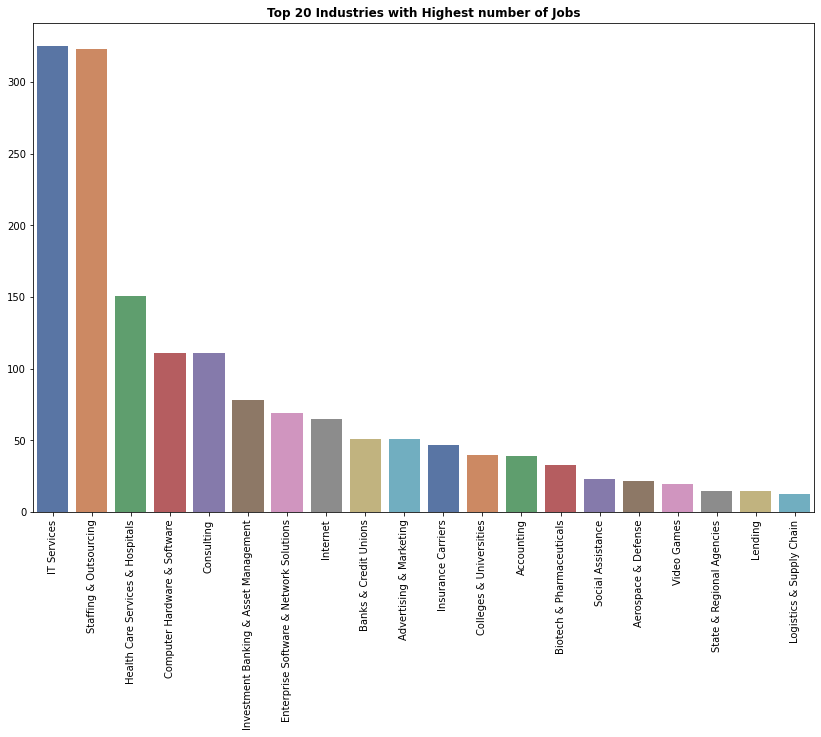

In [17]:
top_industries = data["Industry"].value_counts().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(14,9))
rect1 = sns.barplot(x = top_industries.index, y = top_industries.values, palette="deep").set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Top 20 Industries with Highest number of Jobs", fontweight="bold")

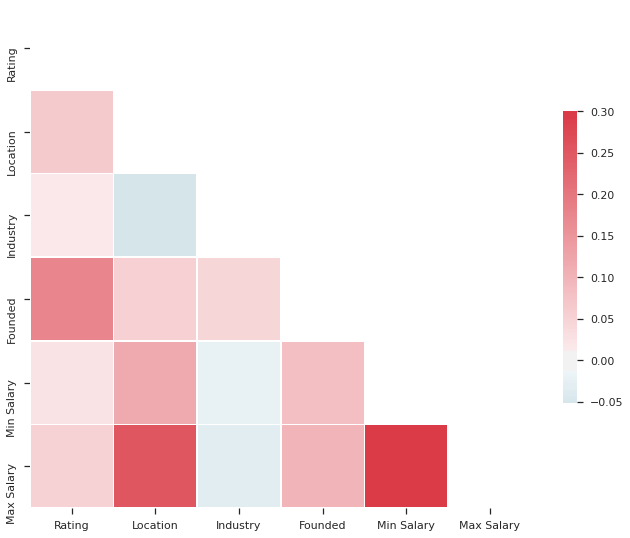

,Rating,Location,Industry,Founded,Min Salary,Max Salary
Rating,1.000000,0.065904,0.016292,0.176102,0.025664,0.051387
Location,0.065904,1.000000,-0.051666,0.054741,0.115020,0.253916
Industry,0.016292,-0.051666,1.000000,0.046422,-0.020745,-0.033682
Founded,0.176102,0.054741,0.046422,1.000000,0.082436,0.099208
Min Salary,0.025664,0.115020,-0.020745,0.082436,1.000000,0.858547
Max Salary,0.051387,0.253916,-0.033682,0.099208,0.858547,1.000000


In [75]:
data_corr = {
    'Rating': data.Rating,
    'Location': data.Location,
    'Industry': data.Industry,
    'Founded': data.Founded,
    'Min Salary': data['Minimum Salary'],
    'Max Salary': data['Maximum Salary']
}

data_corr = pd.DataFrame.from_dict(data_corr)
data_corr['Location'] = data_corr['Location'].astype('category').cat.codes
data_corr['Industry'] = data_corr['Industry'].astype('category').cat.codes

corr = data_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
corr

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

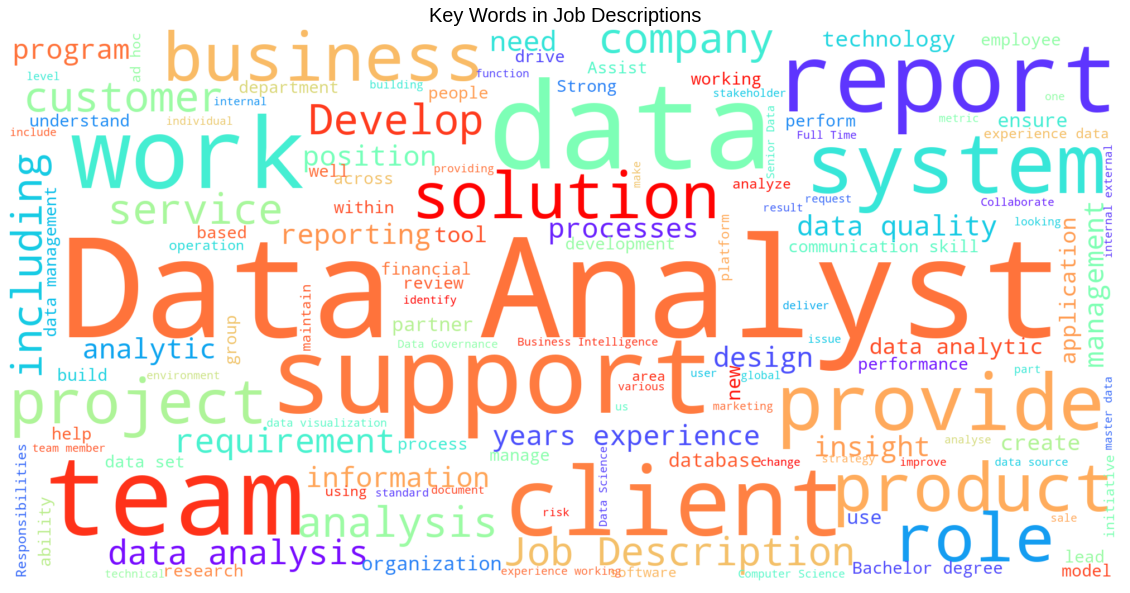

In [36]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from PIL import Image
from nltk.corpus import stopwords

words_cloud = data["Job Description"].str.split("(").str[0].value_counts().keys()
eng_stopwords = stopwords.words("english")
wc1 = WordCloud(stopwords=eng_stopwords,scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(words_cloud))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Job Descriptions",color='black',fontsize=20)
plt.show()


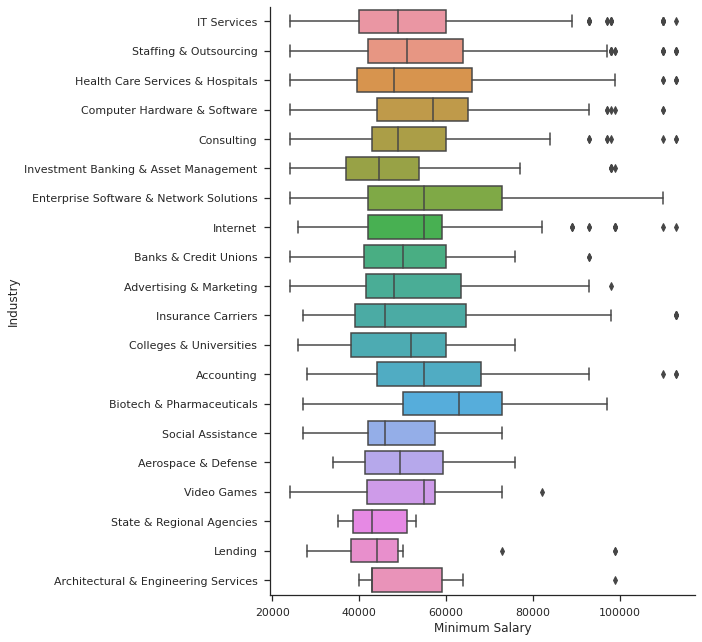

In [69]:
gr = sns.catplot(x = 'Minimum Salary', y = 'Industry', kind = "box", data = data, order = data.Industry.value_counts().iloc[:20].index)
gr.fig.set_size_inches(30, 10)

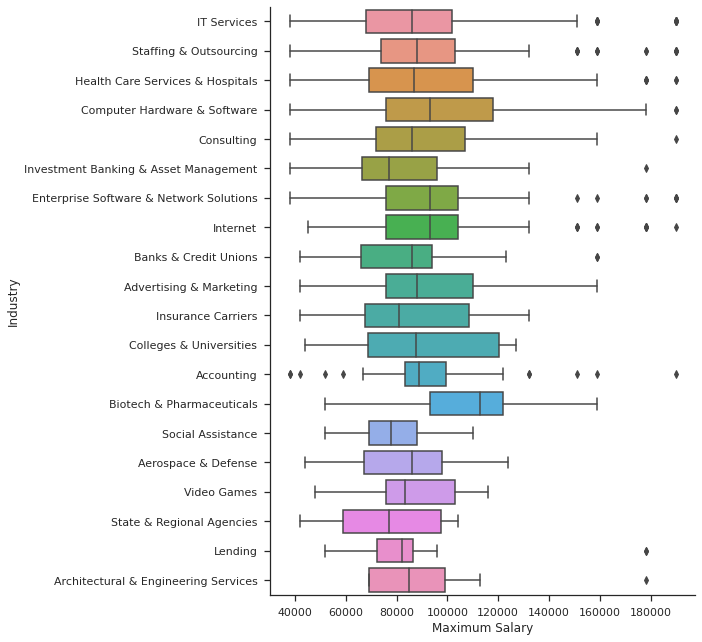

In [70]:
gr = sns.catplot(x = 'Maximum Salary', y = 'Industry', kind = "box", data = data, order = data.Industry.value_counts().iloc[:20].index)
gr.fig.set_size_inches(30, 10)

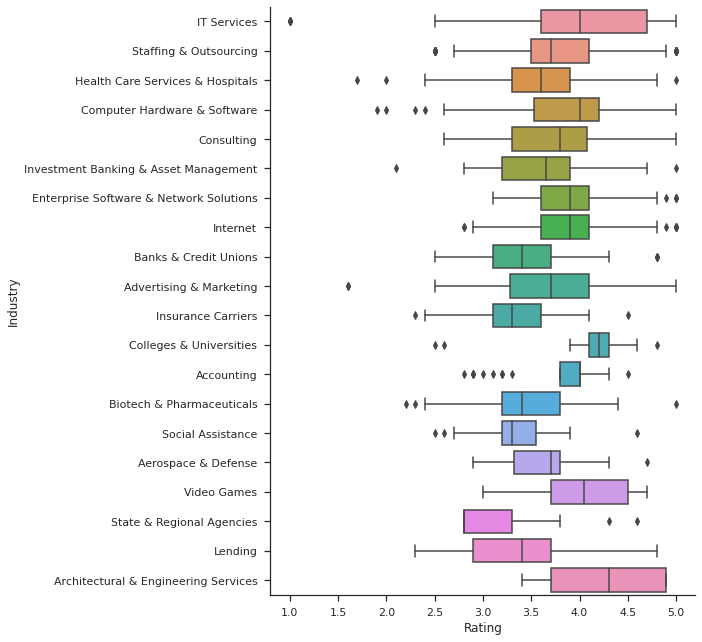

In [71]:
gr = sns.catplot(x = 'Rating', y = 'Industry', kind = "box", data = data, order = data.Industry.value_counts().iloc[:20].index)
gr.fig.set_size_inches(30, 10)